## Netflix Unwrapped


Netflix Unwrapped is a data analytics and visualization project that explores patterns, trends, and insights in a dataset of Netflix titles sourced from Kaggle. The goal is to understand the content distribution, production trends, popular genres, and other meaningful attributes using data wrangling, feature engineering, and visual storytelling.

##  Imported Libraries

Below are the Python libraries used in this project:

- **`matplotlib.pyplot`**: For creating static visualizations and plots.
- **`pandas`**: For data manipulation and analysis.
- **`numpy`**: For numerical computations and array handling.
- **`seaborn`**: For advanced and aesthetically pleasing data visualizations built on top of matplotlib

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Loading the Dataset

The Netflix dataset is loaded using **Pandas** from the specified local path. The first 12 rows are displayed to get an initial overview of the data.




In [2]:
df = pd.read_csv(r'C:/Users/yashi/OneDrive/Desktop/mycodes/data analysis/netflix_titles.csv')
df.head(12)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


##  Dataset Dimensions

To understand the size of the dataset, we use the `.shape` attribute. This returns a tuple representing the number of **rows** and **columns** in the DataFrame.


In [3]:
df.shape

(8807, 12)

##  Handling Missing Values

To ensure data quality, we handle missing values in key columns:

1. **`df.isnull().sum()`** is used to count missing values in each column.
2. Missing values are filled as follows:
   - `director`: Replaced with `'Unknown'`
   - `cast`: Replaced with `'Unknown'`
   - `country`: Replaced with the **most frequent value** (mode) in the column

In [4]:

missing_summary = df.isnull().sum()

df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna(df['country'].mode()[0])

# Display cleaned data summary
print("Missing values after cleaning:\n", df.isnull().sum())

Missing values after cleaning:
 show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64


##  Feature Engineering & Data Transformation

This block of code transforms and enriches the Netflix dataset with new features, while cleaning up unnecessary data:

In [5]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['is_movie'] = df['type'].apply(lambda x: 1 if x == 'Movie' else 0)
df['duration'] = df['duration'].astype(str)
df['duration_int'] = df['duration'].str.extract('(\d+)').astype(float)
df['duration_type'] = df['duration'].str.extract('([a-zA-Z]+)')

# Drop irrelevant columns
df.drop(['show_id'], axis=1, inplace=True)



In [ ]:

df = df.drop_duplicates()

# Standardize text columns
df['country'] = df['country'].str.strip()
df['rating'] = df['rating'].str.upper()

# Ensure 'release_year' is numeric
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
df.head()


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,is_movie,duration_int,duration_type
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,1,90.0,min
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,0,2.0,Seasons
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,0,1.0,Season
3,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,0,1.0,Season
4,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,0,2.0,Seasons


##  Summary Statistics and Basic Insights

This section provides a quick overview of key numeric columns and categorical distributions in the dataset:





In [ ]:

print(df[['release_year', 'year_added', 'duration_int']].describe())

print("Top 5 countries:\n", df['country'].value_counts().head())

print("Type counts:\n", df['type'].value_counts())

       release_year   year_added  duration_int
count   8807.000000  8709.000000   8804.000000
mean    2014.180198  2018.887932     69.846888
std        8.819312     1.567961     50.814828
min     1925.000000  2008.000000      1.000000
25%     2013.000000  2018.000000      2.000000
50%     2017.000000  2019.000000     88.000000
75%     2019.000000  2020.000000    106.000000
max     2021.000000  2021.000000    312.000000
Top 5 countries:
 country
United States     3649
India              972
United Kingdom     419
Japan              245
South Korea        199
Name: count, dtype: int64
Type counts:
 type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [ ]:
genres = df['listed_in'].str.split(", ").reset_index()
genres = genres.explode('listed_in')
genres

,index,listed_in
0,0,Documentaries
1,1,International TV Shows
1,1,TV Dramas
1,1,TV Mysteries
2,2,Crime TV Shows
...,...,...
8805,8805,Children & Family Movies
8805,8805,Comedies
8806,8806,Dramas
8806,8806,International Movies


In [9]:
genres['listed_in'].nunique()
genre_df = genres['listed_in'].value_counts().nlargest(20).reset_index()
genre_df.columns = ['genre','count']
genre_df

,genre,count
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869
5,Action & Adventure,859
6,TV Dramas,763
7,Independent Movies,756
8,Children & Family Movies,641
9,Romantic Movies,616


In [10]:
country_df = df['country'].value_counts().nlargest(20).reset_index()
country_df

,country,count
0,United States,3649
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,199
5,Canada,181
6,Spain,145
7,France,124
8,Mexico,110
9,Egypt,106


In [11]:
duration_df = df['duration'].value_counts().nlargest(20).reset_index()
duration_df.columns = ['Duration','Count']
duration_df

,Duration,Count
0,1 Season,1793
1,2 Seasons,425
2,3 Seasons,199
3,90 min,152
4,94 min,146
5,97 min,146
6,93 min,146
7,91 min,144
8,95 min,137
9,96 min,130


## Visualizing Trends and Content Types

This section includes visualizations to explore how Netflix content has evolved over time:

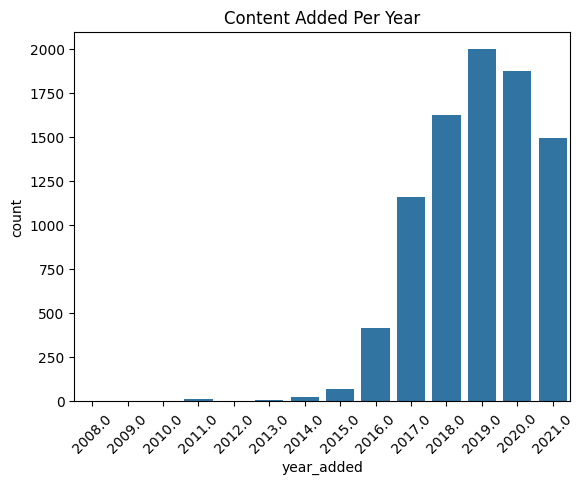

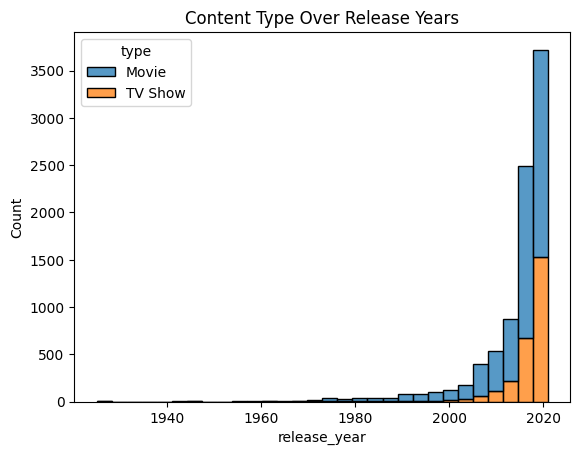

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Trend of content added over years
sns.countplot(data=df, x='year_added', order=sorted(df['year_added'].dropna().unique()))
plt.title('Content Added Per Year')
plt.xticks(rotation=45)
plt.show()

# Type vs Year
sns.histplot(data=df, x='release_year', hue='type', multiple='stack', bins=30)
plt.title('Content Type Over Release Years')
plt.show()

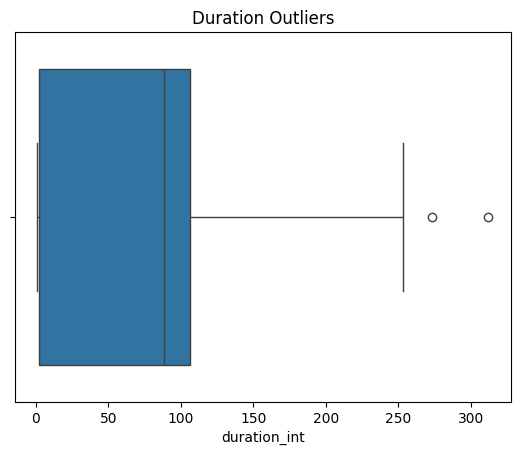

In [13]:
# Visualizing outliers in duration
sns.boxplot(x='duration_int', data=df)
plt.title('Duration Outliers')
plt.show()

# Handle extreme duration values
q_low = df['duration_int'].quantile(0.01)
q_high = df['duration_int'].quantile(0.99)
df = df[(df['duration_int'] >= q_low) & (df['duration_int'] <= q_high)]


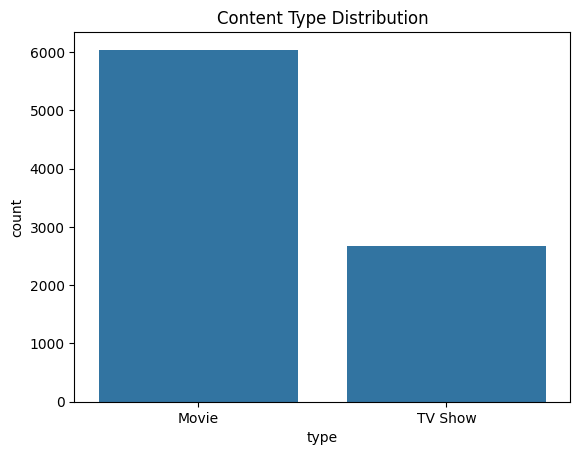

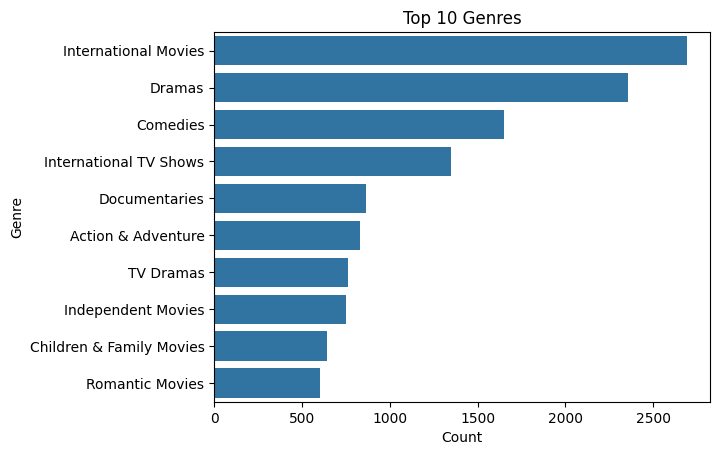

In [14]:
# Distribution of content types
sns.countplot(x='type', data=df)
plt.title("Content Type Distribution")
plt.show()

# Top 10 most popular genres
from collections import Counter
genres = df['listed_in'].str.split(', ')
flat_genres = [genre for sublist in genres.dropna() for genre in sublist]
top_genres = Counter(flat_genres).most_common(10)

# Convert to DataFrame for plotting
genre_df = pd.DataFrame(top_genres, columns=['Genre', 'Count'])

sns.barplot(data=genre_df, x='Count', y='Genre')
plt.title("Top 10 Genres")
plt.show()
